In [1]:
import pickle
kongjian = pickle.load(open('kongjian.pkl', 'rb'))

In [2]:
num = '十一二三四五六七八九'
def to_days(text):
    text = text.replace('月天', '月')
    text = text.replace('后恋爱', '')
    text = text.replace('个', '')
    text = text.replace('左右', '')
    text = text.replace('小于', '')
    text = text.replace('半', '.5')
    if '忘' in text or 'N' in text or 'n' in text or '？' in text or not text.strip():
        return 
    for i,n in enumerate(num):
        text = text.replace(n, str(i))
    if text[-1] == '天':
        text = text.replace('天','')
        if text.strip():
            return int(text)
        else:
            return
    if text[-1] == '月':
        return int(text[:-1]) * 30
    if text[-1] == '年':
        return float(text[:-1]) * 365

durations = [to_days(v['duration']) for v in kongjian.values() if len(v)>0]
durations = [t for t in durations if t]

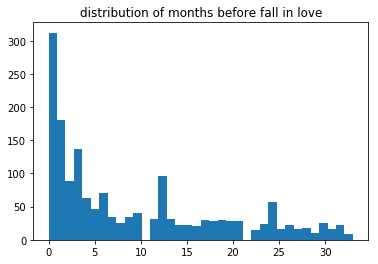

In [4]:
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline
months = [int(t/30) for t in durations if t < 365*3]
plt.hist(months, 36)
plt.title('distribution of months before fall in love')

(0, 1)

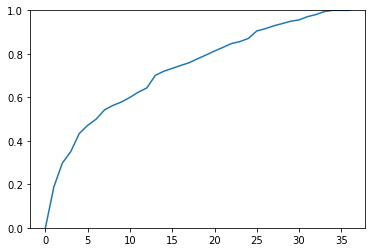

In [13]:
cumulate = [0]
for i in range(36):
    cumulate.append(len([m for m in months if m <= i]))
cumulate = [c/cumulate[-1] for c in cumulate]
plt.plot(cumulate)
plt.ylim(0,1)

In [201]:
import pandas as pd
import numpy as np

data = pd.read_csv('user.csv')

In [202]:
y = []
for uid in data['userID']:
    uid = str(uid)
    if uid in kongjian and len(kongjian[uid]) > 0:
        t = to_days(kongjian[uid]['duration'])
        if t:
            y.append(t)
        else:
            y.append(np.nan)
    else:
        y.append(np.nan)
y = pd.DataFrame(y)
# y.rename(columns={0:'days_before_love'})
data = pd.concat([data,y],axis=1)

In [204]:
def jitter(series, factor):
    z = float(series.max())-float(series.min())
    a = float(factor)*z/50.
    return series.apply(lambda x: x+np.random.uniform(-a,a))

def correlate(data, label1, label2):
    data1 = jitter(data[label1], 1)
    data2 = jitter(data[label2], 1)
    new_data = pd.concat([data1, data2], axis=1)
    new_data = new_data.dropna(axis=0)
    new_data.plot(kind='scatter', x=label1, y=label2, alpha=.5)
    print(new_data.corr())

          年龄         0
年龄  1.000000  0.285841
0   0.285841  1.000000


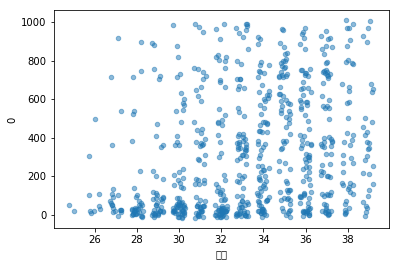

In [205]:
correlate(data[(data['年龄']<40)&(data[0]<1000)], '年龄', 0)

          年龄         0
年龄  1.000000  0.340218
0   0.340218  1.000000


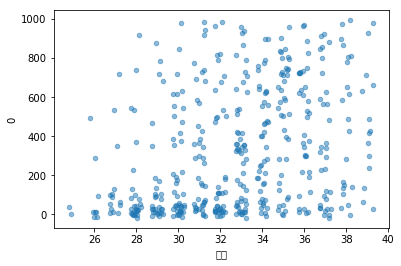

In [206]:
correlate(data[(data['年龄']<40)&(data[0]<1000)&(data['性别']=='女')], '年龄', 0)

          相貌自评         0
相貌自评  1.000000  0.093887
0     0.093887  1.000000


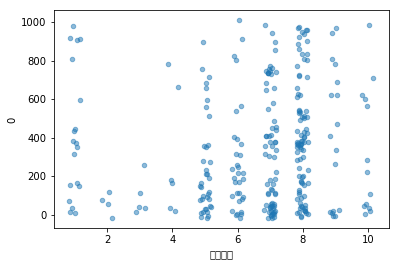

In [212]:
correlate(data[(data[0]<1000)&(data['性别']=='男')], '相貌自评', 0)

             creditedNum         0
creditedNum     1.000000 -0.230516
0              -0.230516  1.000000


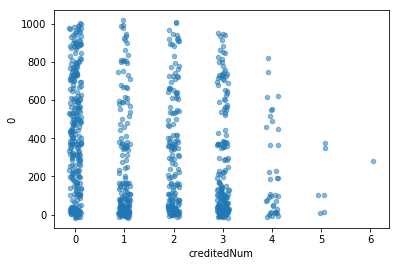

In [215]:
correlate(data[(data[0]<1000)], 'creditedNum', 0)

In [260]:
def category_mean(data, label):
    new_data = pd.concat([data[label],data[0]], axis=1)
    new_data = new_data.dropna(axis=0)
    values = set(new_data[label].values)
    values = {v:0 for v in values}
    for value in values:
        values[value] = new_data[new_data[label]==value][0].mean()
    return sorted(values.items(), key=lambda x:x[1], reverse=True)


In [240]:
category_mean(data[(data[0]<3650)&(data['性别']=='女')], '文凭')

{'中专/职高/技校': 184.6153846153846,
 '初中': 36.0,
 '大专': 126.02586206896552,
 '本科': 391.36801242236027,
 '硕士': 393.8181818181818,
 '高中': 314.77142857142854}

In [241]:
category_mean(data[(data[0]<3650)&(data['性别']=='男')], '文凭')

{'中专/职高/技校': 167.73529411764707,
 '初中': 386.6666666666667,
 '博士': 358.75,
 '大专': 106.3125,
 '本科': 424.7897196261682,
 '硕士': 325.9230769230769,
 '高中': 294.39473684210526}

In [242]:
category_mean(data[(data[0]<3650)&(data['性别']=='男')], '照片')

{'无': 376.50892857142856, '有': 317.91188524590166}

In [243]:
category_mean(data[(data[0]<3650)&(data['性别']=='女')], '照片')

{'无': 386.93582887700535, '有': 298.3838709677419}

In [265]:
print('十二星座男性从相识到相恋平均花费时间(天)')
category_mean(data[(data[0]<10000)&(data['性别']=='男')], '星座')

十二星座男性从相识到相恋平均花费时间(天)


[('白羊座', 457.05555555555554),
 ('魔羯座', 433.2),
 ('水瓶座', 399.3333333333333),
 ('巨蟹座', 364.96666666666664),
 ('狮子座', 359.2),
 ('天秤座', 342.92424242424244),
 ('射手座', 314.1666666666667),
 ('处女座', 310.1951219512195),
 ('双子座', 296.9714285714286),
 ('双鱼座', 295.67857142857144),
 ('天蝎座', 272.6666666666667),
 ('金牛座', 232.33333333333334)]

In [266]:
print('十二星座女性从相识到相恋平均花费时间(天)')
category_mean(data[(data[0]<10000)&(data['性别']=='女')], '星座')

十二星座女性从相识到相恋平均花费时间(天)


[('双鱼座', 448.40909090909093),
 ('白羊座', 391.575),
 ('金牛座', 368.9375),
 ('天蝎座', 364.5581395348837),
 ('狮子座', 334.16),
 ('巨蟹座', 333.2432432432432),
 ('双子座', 320.3888888888889),
 ('天秤座', 311.2692307692308),
 ('魔羯座', 296.02830188679246),
 ('处女座', 276.1111111111111),
 ('射手座', 268.55555555555554),
 ('水瓶座', 242.82758620689654)]

In [270]:
category_mean(data[(data[0]<1000)&(data['性别']=='女')], '月薪')

[('水晶及以上级别可见', 583.0),
 ('>50000', 352.0),
 ('2000以下', 313.53636363636366),
 ('2000-5000', 306.3673469387755),
 ('5000-10000', 293.7625),
 ('10000-20000', 266.77777777777777)]

In [271]:
category_mean(data[(data[0]<1000)&(data['性别']=='男')], '月薪')

[('2000以下', 362.65714285714284),
 ('5000-10000', 320.4320987654321),
 ('2000-5000', 312.67127071823205),
 ('10000-20000', 284.23809523809524),
 ('>50000', 209.0),
 ('20000-50000', 153.4),
 ('水晶及以上级别可见', 36.0)]